Assignment
----------

create an algorithm to sample from the normal distribution

$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\!\Bigl(-\frac{(x-\mu)^2}{2\sigma^2}\Bigr)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

print(np,plt)

<module 'numpy' from 'C:\\Users\\Administrator\\scoop\\apps\\miniconda3\\current\\Lib\\site-packages\\numpy\\__init__.py'> <module 'matplotlib.pyplot' from 'C:\\Users\\Administrator\\scoop\\apps\\miniconda3\\current\\Lib\\site-packages\\matplotlib\\pyplot.py'>


In [23]:
mu = 7.0
x = np.linspace(mu-5,mu+5,100)
sigma = 2.0

In [63]:
def f(x,mu,sigma):
    sigmasq = sigma**2.0
    constant = 1/np.sqrt(2*np.pi*sigmasq)
    distance = x - mu
    return constant * np.exp(-(distance**2) / (2*sigmasq))
p_x = f(x,mu,sigma)

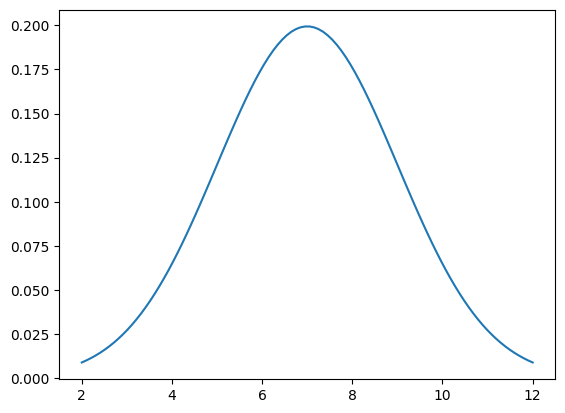

In [27]:
plt.plot(x,p_x)

A few definitions that we don't need to explore as we would get out of scope:
$$
\mathrm{erf}(x) 
= \frac{2}{\sqrt{\pi}} 
  \int_{0}^{x} 
  e^{-t^2}\, dt.
$$

The cumulative density function of the Normal distribution is:
$$
F_X(x)
= \frac12
  \Bigl[
    1 + \mathrm{erf}\!\Bigl(
      \frac{x - \mu}{\sigma \sqrt{2}}
    \Bigr)
  \Bigr].
$$

$$
\text{where } X \sim \mathcal{N}(\mu, \sigma^2).
$$

In [64]:
def F(x,mu,sigma):
    distance = x - mu
    return 0.5 * (1+ scipy.special.erf(distance/(sigma*np.sqrt(2))))
p_F_x = F(x,mu,sigma)

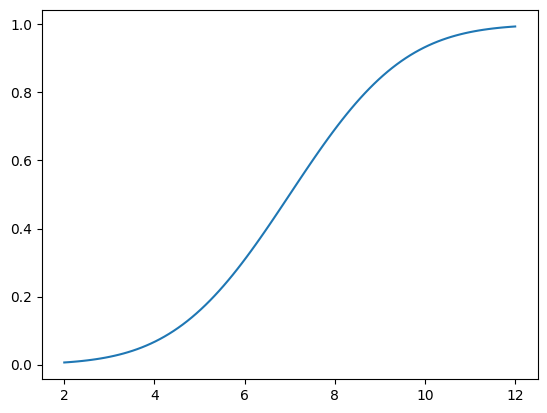

In [65]:
plt.plot(x,p_F_x)

**Step 1:**  
$$
F_X(x) \;=\; \tfrac{1}{2}\,\Bigl[\,1 \;+\;\mathrm{erf}\!\Bigl(\tfrac{x-\mu}{\sigma\,\sqrt{2}}\Bigr)\Bigr].
$$

**Step 2:**  
Let  
$$
p \;=\; F_X(x).
$$  
Then  
$$
p 
\;=\; 
\tfrac{1}{2}\,\Bigl[\,1 \;+\;\mathrm{erf}\!\Bigl(\tfrac{x-\mu}{\sigma\,\sqrt{2}}\Bigr)\Bigr].
$$

**Step 3:**  
$$
2p \;-\; 1
\;=\;
\mathrm{erf}\!\Bigl(\tfrac{x-\mu}{\sigma\,\sqrt{2}}\Bigr).
$$

**Step 4:**  
$$
\mathrm{erf}^{-1}(2p \;-\; 1)
\;=\;
\tfrac{x-\mu}{\sigma\,\sqrt{2}}.
$$

**Step 5:**  
$$
x
\;=\;
\mu
\;+\;
\sigma\,\sqrt{2}\,\mathrm{erf}^{-1}(\,2p - 1\,).
$$

Hence, the inverse CDF (quantile function) is  
$$
F_X^{-1}(p)
\;=\;
\mu
\;+\;
\sigma\,\sqrt{2}\,\mathrm{erf}^{-1}(\,2p - 1\,).
$$

In [74]:
p_linspace = np.linspace(0,1,100)
def F_inv(p, mu, sigma):
    return mu + sigma * np.sqrt(2) * scipy.special.erfinv(2 * p - 1)

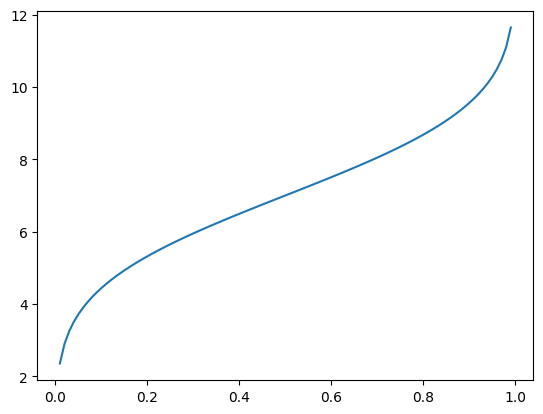

In [75]:
plt.plot(p_linspace, F_inv(p_linspace, mu, sigma))

In [76]:
sample_size = 10
def do_samples(sample_size, mu, sigma):
    p_samples = np.random.uniform(0,1,sample_size)
    x_samples = F_inv(p_samples, mu, sigma)
    return x_samples
x_samples = do_samples(sample_size, mu, sigma)
print(x_samples)

[ 6.85568417  8.59187494  7.66604279  8.66498984  6.23515623  7.48879627
  4.22187317  8.184484    6.67634482 10.61670883]


[4.22187317 4.32187317 4.42187317 4.52187317 4.62187317 4.72187317
 4.82187317 4.92187317 5.02187317 5.12187317]


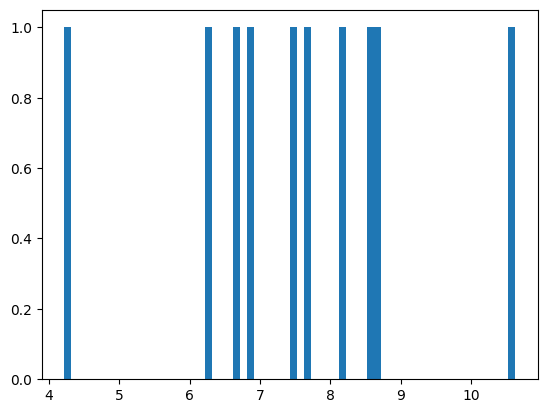

In [77]:
def plot_hist(x_samples, bin_width=0.1):
    bins = np.arange(x_samples.min(), x_samples.max()+bin_width, bin_width)
    print(bins[0:10])
    _ = plt.hist(x_samples, bins=bins)
plot_hist(x_samples)

In [71]:
empirical_mu = np.mean(x_samples)
empirical_sigma = np.std(x_samples)
print(empirical_mu, empirical_sigma)

7.287161303656054 1.9537150089089574


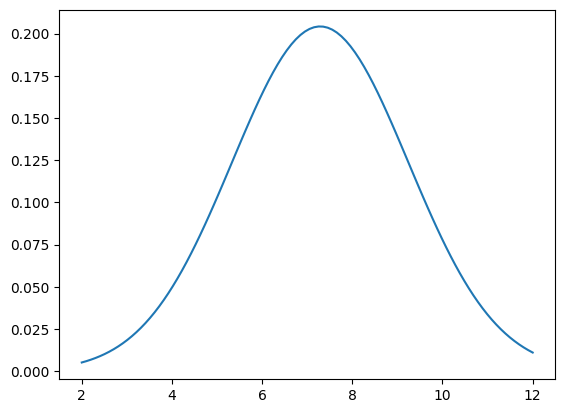

In [72]:
empirical_p_x = f(x, empirical_mu, empirical_sigma)
plt.plot(x,empirical_p_x)


6.166746251657143 0.6108282609439613
6.683262972509898 1.2244825546598452
9.245647681935123 2.1337955597444904
6.5821584701692935 0.409369987780956
6.216553162390165 1.0646509877361416
5.502792661050618 2.679460519662521
8.23107616946565 1.7147609477262193
7.608456257465104 0.6971046679179165
6.19797158672832 0.16377001711405192
8.04550034297396 0.2043253165528256


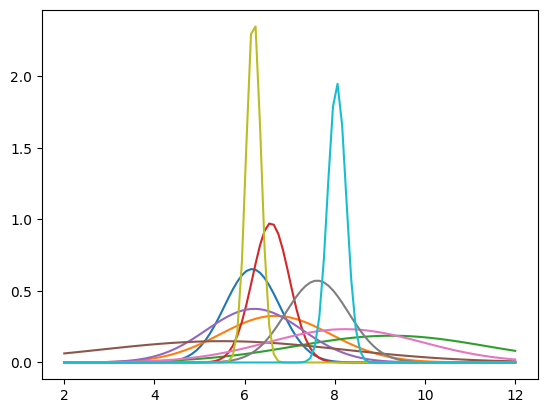

In [82]:
n_it = 10
sample_size = 2
for i in range(n_it):
    x_samples = do_samples(sample_size, mu, sigma)
    empirical_mu = np.mean(x_samples)
    empirical_sigma = np.std(x_samples)
    print(empirical_mu, empirical_sigma)
    empirical_p_x = f(x, empirical_mu, empirical_sigma)
    plt.plot(x,empirical_p_x)
plt.show()
